In [99]:
import pandas as pd

In [77]:
import numpy as np

In [2]:
import pickle

In [125]:
import report

In [130]:
from IPython.display import display,clear_output

In [1]:
filename = "min L2 scoring generation 17"

In [100]:
file = open(filename,'rb')
brains = pickle.load(file)
room = pickle.load(file)
tspan = pickle.load(file)
scores = pickle.load(file)
food_list = pickle.load(file)

In [131]:
def simulate_generation_notebook(animals, room, tspan, generation, food_list):
    from IPython.display import display,clear_output
    # TODO: need to show the desired room instead of the last one
    fig, ax = plt.subplots()
    #colors = cm.rainbow(np.linspace(0, 1, len(animals)))

    for tt in range(tspan):
        if tt % 10 == 0:
            ax.clear()
            for idx, animal in enumerate(animals):
                if animal.is_parent and generation != 0:
                    ax.add_patch(
                        plt.Circle((animal.hand_positions_x[tt], animal.hand_positions_y[tt]), room.r_h, color="b",
                                   alpha=0.5))
                else:
                    ax.add_patch(
                        plt.Circle((animal.hand_positions_x[tt], animal.hand_positions_y[tt]), room.r_h, color='m',
                                   alpha=0.5))
                # ax.add_patch(plt.Circle((room.food_positions_x[tt], room.food_positions_y[tt]), room.r, color=room.food[3], alpha=0.5))

            ax.add_patch(plt.Circle((food_list[-1][tt][0], food_list[-1][tt][1]), room.r, color='r', alpha=1))
            ax.add_patch(plt.Circle((room.left_eye, 0), 3, color='green', alpha=0.5))
            ax.add_patch(plt.Circle((room.right_eye, 0), 3, color='green', alpha=0.5))

            ax.set_aspect('equal', adjustable='datalim')

            titname = "generation: {}\n t={}/{} Best score:{}".format(generation + 1, tt, tspan, animals[0].scoring)
            plt.title(titname)
            ax.plot()  # Causes an autoscale update.
            display(fig)
            clear_output(wait=True)


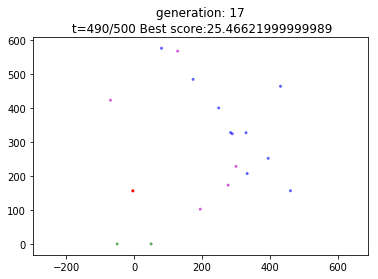

In [133]:
simulate_generation_notebook(brains, room, tspan, 16, food_list)

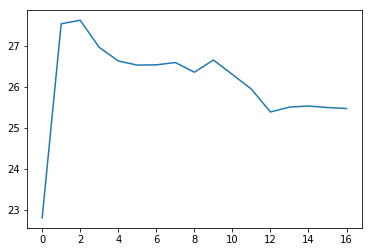

In [75]:
plt.plot(scores)

In [78]:
np.shape(food_list)

(10, 501, 2)

In [89]:
food_list[0].shape

(501, 2)

In [102]:
food_list_pd = pd.DataFrame(food_list[0])

Text(0,0.5,'Y')

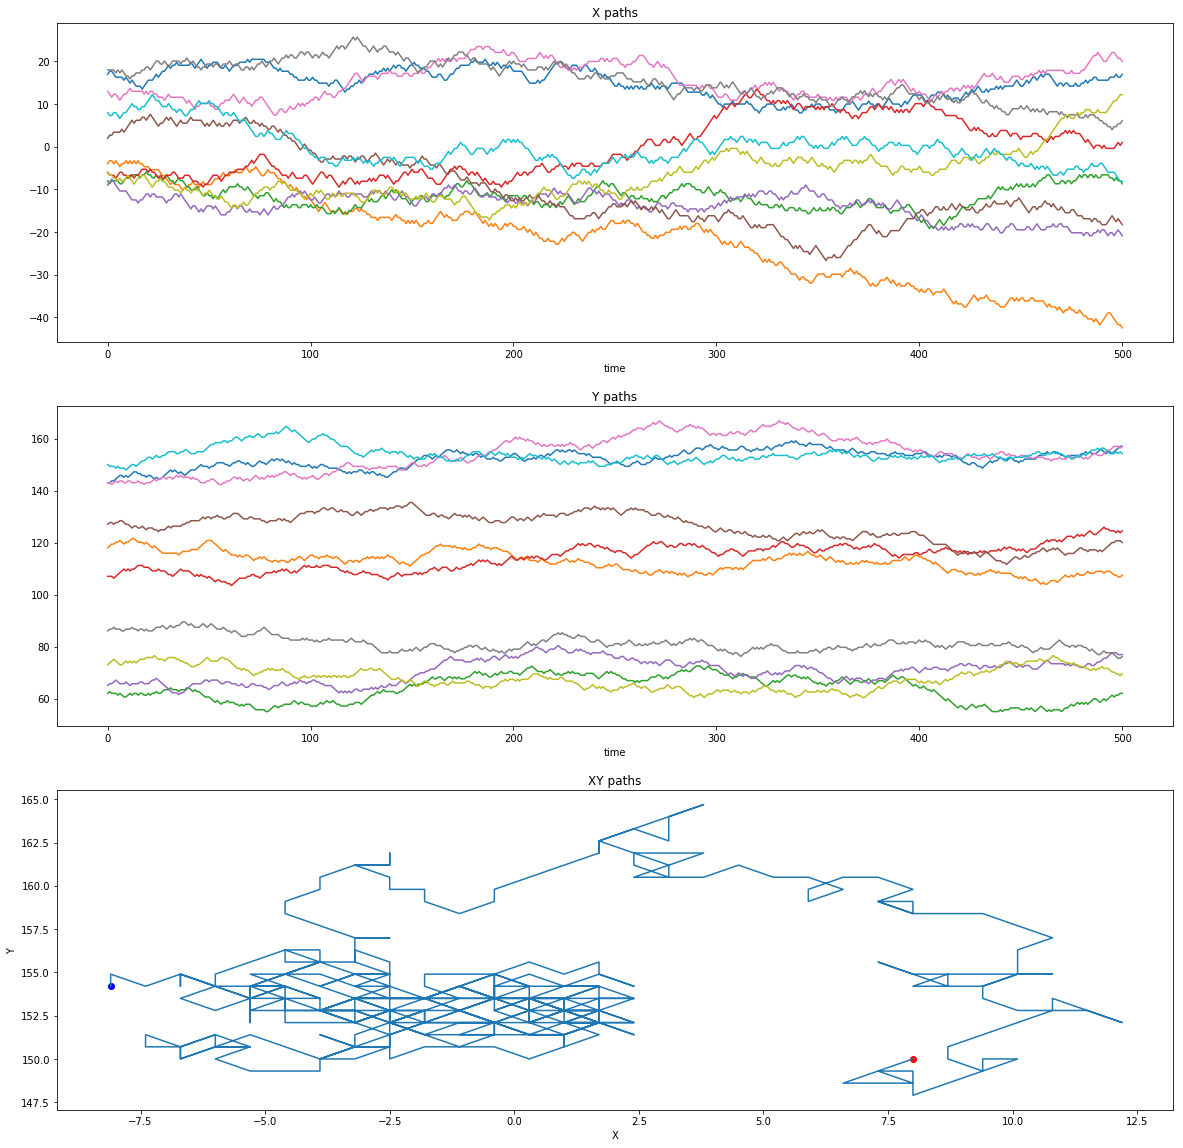

In [119]:
plt.figure(figsize=(20,20))
plt.subplot(311)
for i in range(10):
    food_list_pd = pd.DataFrame(food_list[i])
    plt.plot(food_list_pd[0])
plt.title('X paths')
plt.xlabel('time')
plt.subplot(312)
for i in range(10):
    food_list_pd = pd.DataFrame(food_list[i])    
    plt.plot(food_list_pd[1])
plt.title('Y paths')
plt.xlabel('time')

plt.subplot(313)
plt.scatter(food_list_pd[0][0],food_list_pd[1][0],c='r')
plt.plot(food_list_pd[0],food_list_pd[1])
plt.scatter(food_list_pd[0][500],food_list_pd[1][500],c='b')

plt.title('XY paths')
plt.xlabel('X')
plt.ylabel('Y')

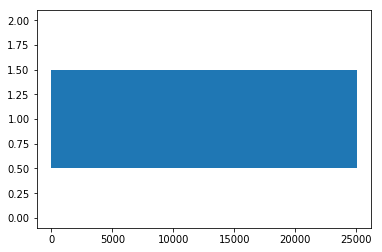

In [55]:
plt.eventplot(object_file[12].cortical_cells.neurons[0].all_fires)

In [70]:
object_file[1]

In [21]:
import matplotlib.pyplot as plt

Text(0.5,0.98,'all L2 ')

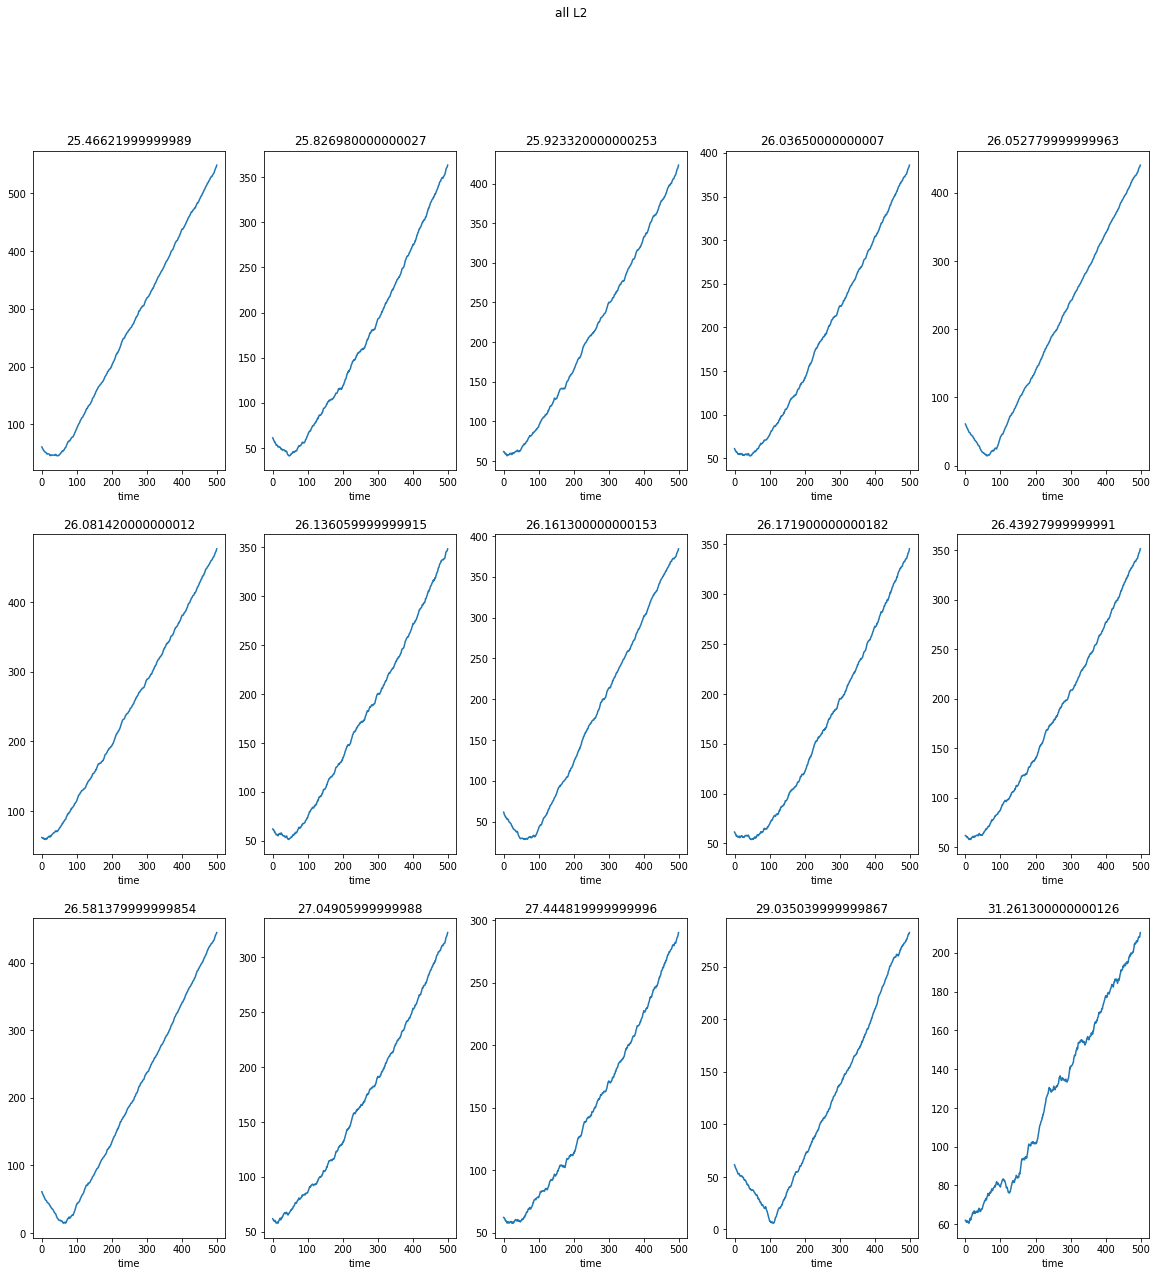

In [27]:
l2_fig = plt.figure(figsize=(20,20))
for idx, brain in enumerate(object_file):
    plt.subplot(3,5,idx+1)
    plt.plot(brain.all_L2)
    plt.xlabel('time')
    plt.title(str(brain.min_L2))
plt.suptitle('all L2 ')